In [1]:
import json
import csv
import pandas as pd
import numpy as np 

from igraph import *
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.spatial import distance

from scipy.spatial import Delaunay

In [3]:
uber_filename = '/uber_dec.txt'
DIR_PATH ="graph_data/"
UBER_DIR_PATH = "uber_data/"

In [34]:
graph = Graph.Read_Ncol(UBER_DIR_PATH + uber_filename,  directed = False)

In [104]:
adj = graph.get_adjacency(attribute='weight', eids=False)

# Applying tspy
    
    https://github.com/wborgeaud/tspy
    NxN distance matrix D

In [102]:

!pip3 install tspy

In [103]:
from tspy import TSP
tsp = TSP()

In [118]:
tsp.read_mat(np.matrix(adj.data))

In [ ]:
from tspy.solvers import TwoOpt_solver
two_opt = TwoOpt_solver(initial_tour='NN', iter_num=100)
two_opt_tour = tsp.get_approx_solution(two_opt)

In [ ]:
best_tour = tsp.get_best_solution()

# Applying satsp
    https://github.com/hcluo/satsp


In [108]:
!pip3 install satsp

In [109]:
from satsp import solver

In [110]:
solver.Solve(dist_matrix = adj)

Simulated Annealing starts with parameters:
Initial Temperature:  13949.253781194839
Cooling Rate:  0.99
Initial Epoch Length:  100
Stopping Criterion: No Improvement for 100 epochs

Epoch  1
Temperature:  13949.253781194839
Epoch Length:  100
Current Dist:  1566683.6900000023
Best Dist:  1566683.6900000023
Epoch  2
Temperature:  13809.76124338289
Epoch Length:  100
Current Dist:  1539225.7800000026
Best Dist:  1537174.8900000027
Epoch  3
Temperature:  13671.663630949062
Epoch Length:  100
Current Dist:  1479486.7600000026
Best Dist:  1477416.7600000026
Epoch  4
Temperature:  13534.946994639571
Epoch Length:  100
Current Dist:  1450602.460000003
Best Dist:  1446166.730000003
Epoch  5
Temperature:  13399.597524693176
Epoch Length:  100
Current Dist:  1426416.520000004
Best Dist:  1423378.230000004
Epoch  6
Temperature:  13265.601549446244
Epoch Length:  100
Current Dist:  1401441.5200000033
Best Dist:  1399610.8400000033
Epoch  7
Temperature:  13132.945533951783
Epoch Length:  100
Curre

Epoch  65
Temperature:  7331.678790998676
Epoch Length:  100
Current Dist:  1042093.0900000036
Best Dist:  1033374.4000000037
Epoch  66
Temperature:  7258.36200308869
Epoch Length:  100
Current Dist:  1037065.4300000032
Best Dist:  1027395.6300000036
Epoch  67
Temperature:  7185.778383057803
Epoch Length:  100
Current Dist:  1018914.0400000028
Best Dist:  1014060.9100000031
Epoch  68
Temperature:  7113.920599227225
Epoch Length:  100
Current Dist:  1018771.5700000027
Best Dist:  1014060.9100000031
Epoch  69
Temperature:  7042.781393234953
Epoch Length:  100
Current Dist:  997477.7200000029
Best Dist:  996281.4500000027
Epoch  70
Temperature:  6972.353579302603
Epoch Length:  100
Current Dist:  1006426.5800000028
Best Dist:  996281.4500000027
Epoch  71
Temperature:  6902.630043509577
Epoch Length:  100
Current Dist:  1005372.8400000023
Best Dist:  996281.4500000027
Epoch  72
Temperature:  6833.603743074482
Epoch Length:  100
Current Dist:  1002513.5800000028
Best Dist:  996281.450000002

In [111]:
solver.GetBestDist()

915371.7000000018

In [115]:
solver.GetBestTour()

[1,
 609,
 2445,
 1491,
 2485,
 643,
 128,
 1113,
 1138,
 853,
 1223,
 848,
 2329,
 2575,
 789,
 2120,
 1023,
 2491,
 1980,
 1829,
 1880,
 2616,
 977,
 342,
 2263,
 570,
 310,
 510,
 1090,
 1439,
 677,
 667,
 1250,
 1614,
 766,
 2314,
 1377,
 120,
 555,
 1608,
 2520,
 600,
 2223,
 1753,
 138,
 1946,
 202,
 2569,
 1830,
 1520,
 42,
 2621,
 83,
 68,
 1855,
 159,
 495,
 1255,
 1071,
 1775,
 1355,
 22,
 37,
 2030,
 1999,
 575,
 1808,
 1836,
 2401,
 1384,
 1653,
 1688,
 606,
 1062,
 1695,
 1666,
 191,
 1833,
 2431,
 1501,
 2190,
 2264,
 312,
 1209,
 780,
 1806,
 2017,
 1615,
 2298,
 370,
 1340,
 1269,
 49,
 542,
 1911,
 896,
 1224,
 523,
 1992,
 279,
 118,
 259,
 1480,
 32,
 1627,
 2102,
 2226,
 1898,
 2510,
 114,
 1493,
 681,
 892,
 625,
 583,
 2,
 540,
 1751,
 220,
 402,
 2127,
 1624,
 1005,
 1450,
 1123,
 582,
 1105,
 549,
 2596,
 1407,
 517,
 468,
 427,
 1232,
 1400,
 364,
 588,
 440,
 2457,
 1433,
 2255,
 1147,
 1165,
 2291,
 1597,
 1196,
 325,
 715,
 343,
 2374,
 1819,
 463,
 1418,
 2

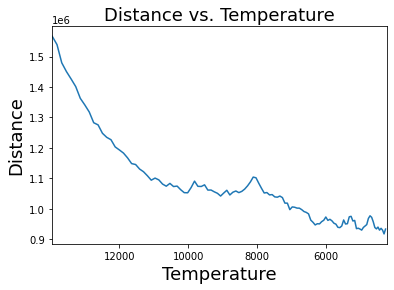

In [114]:
solver.PrintConvergence()

# Applying elkai
    https://github.com/filipArena/elkai 


In [122]:
!pip3 install elkai

     |████████████████████████████████| 93 kB 1.8 MB/s eta 0:00:01


In [123]:
import elkai

In [125]:
best_elkai_tour = elkai.solve_float_matrix(adj.data, runs=10) 

In [126]:
best_elkai_tour

[0,
 2158,
 1199,
 961,
 2072,
 677,
 1654,
 2572,
 1198,
 521,
 728,
 853,
 590,
 503,
 2283,
 1941,
 2379,
 687,
 1735,
 1767,
 485,
 1180,
 874,
 1573,
 1016,
 1391,
 1108,
 1810,
 2280,
 1093,
 1410,
 607,
 2,
 756,
 2348,
 1867,
 1722,
 129,
 2046,
 1430,
 1899,
 2479,
 360,
 700,
 1747,
 2233,
 1832,
 2512,
 2234,
 861,
 578,
 2396,
 1219,
 2577,
 2616,
 1936,
 1284,
 919,
 1700,
 1806,
 34,
 1306,
 344,
 1713,
 310,
 2529,
 1780,
 747,
 1220,
 895,
 1051,
 1818,
 2079,
 1408,
 458,
 145,
 2274,
 2606,
 2232,
 1320,
 391,
 1052,
 456,
 1310,
 96,
 103,
 2034,
 548,
 1680,
 1470,
 1350,
 1166,
 85,
 2270,
 117,
 2142,
 455,
 2464,
 1518,
 1125,
 1141,
 1040,
 573,
 1426,
 1116,
 1625,
 1599,
 2492,
 2321,
 362,
 1753,
 2236,
 2099,
 470,
 2089,
 1816,
 2186,
 79,
 2005,
 1048,
 1661,
 2198,
 816,
 873,
 1779,
 619,
 1649,
 900,
 1352,
 316,
 1728,
 2478,
 215,
 1895,
 2254,
 57,
 112,
 1058,
 53,
 127,
 561,
 178,
 2446,
 1667,
 780,
 1297,
 370,
 2534,
 159,
 2112,
 121,
 2219,
 

# Applying tsp
    https://pypi.org/project/tsp/

In [127]:
!pip3 install tsp

     |████████████████████████████████| 44 kB 694 kB/s eta 0:00:011
     |████████████████████████████████| 40.6 MB 14.3 MB/s eta 0:00:01


In [128]:
import tsp

In [129]:
mat = adj.data
r = range(len(mat))

In [130]:
dis = {(i, j): mat[i][j] for i in r for j in r}

In [ ]:
best_tsp_tour = tsp.tsp(r, dis)